In [1]:
from dotenv import load_dotenv
import os
from pathlib import Path

env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

# reference: https://stackoverflow.com/questions/16924471/difference-between-os-getenv-and-os-environ-get
try:
    api_key = os.environ["GOOGLE_API_KEY"]
    os.environ["GOOGLE_GENAI_USE_VERTEXAI"] = "FALSE"
    print("✅ Gemini API key setup complete.")
except Exception as e:
    print(f"🔑 Authentication Error: Please make sure you have added 'GOOGLE_API_KEY' in .env file. Details: {e}")

✅ Gemini API key setup complete.


In [2]:
from google.adk.agents import Agent, SequentialAgent, ParallelAgent, LoopAgent
from google.adk.runners import InMemoryRunner
from google.adk.tools import AgentTool, FunctionTool, google_search
from google.genai import types

print("✅ ADK components imported successfully.")

✅ ADK components imported successfully.


 ## Multi-Agent Systems

 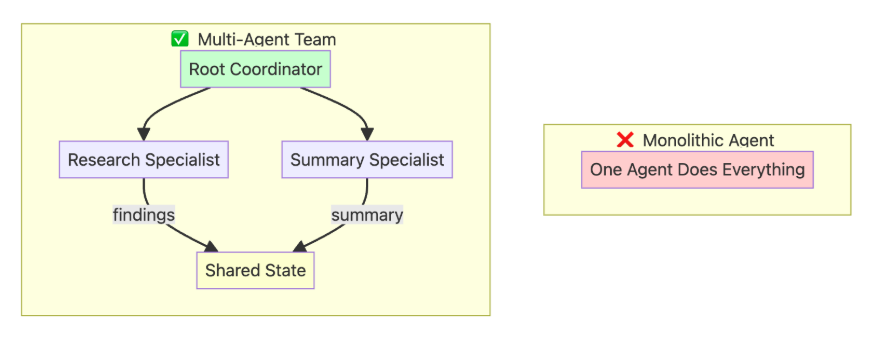

 - Research Agent: 구글 검색을 통해서 정보를 찾아오는 에이전트
 - Summerizer Agent: 위에서 찾은 자료를 요약하는 에이전트

In [7]:
# Research Agent: Its job is to use the google_search tool and present findings
research_agent = Agent(
    name="ResearchAgent",
    model="gemini-2.5-flash-lite",
    instruction="""
    You are a specialized research agent. Your one and only job is to use the google_search tool 
    to find 2-3 pieces of relevant information on the given topic and present the findings 
    with proper citations.""",
    tools=[google_search],
    output_key="research_findings",
)

print("✅ research_agent created.")

✅ research_agent created.


In [14]:
# Summarizer Agent: Its job is to summarize the text it receives
summarizer_agent = Agent(
    name="SummarizerAgent",
    model="gemini-2.5-flash-lite",
    instruction="""
Read the provided research findings: {research_findings} 
Create a concise summary as a bulleted list with 3-5 key points with proper citations in parentheses.""",
output_key="final_summary",
)

print("✅ summarizer_agent created.")

✅ summarizer_agent created.


In [17]:
# Root Coordinator: Orchestrates the workflow by calling the sub-agents as tools
root_agent = Agent(
    name="ResearchCoordinator",
    model="gemini-2.5-flash-lite",
    # This instruction tells the root agent HOW to use its tools
    instruction="""You are a research coordinator. Your goal is to answer the user's query by orchestrating a workflow.
    1. First, you MUST call the `ResearchAgent` tool to find relevant information on the topic provided by the user.
    2. Next, after receiving the reserach findings, you MUST call the `SummarizerAgent` tool to create a concise summary.
    3. Finally, present the final summary claerly to the user as your response in Korean with proper citations.""",
    tools=[
        AgentTool(research_agent),
        AgentTool(summarizer_agent)
    ],
)
print("✅ root_agent created.")

✅ root_agent created.


In [19]:
runner = InMemoryRunner(agent = root_agent)
response = await runner.run_debug("What are the latest advancements in sns user tracking technologies?")


 ### Created new session: debug_session_id

User > What are the latest advancements in sns user tracking technologies?


ResearchCoordinator > 최신 SNS 사용자 추적 기술의 발전, 개인정보 보호 강화, 활용 도구에 대한 요약은 다음과 같습니다.

*   **AI 및 머신러닝 기반 기술 발전**: SNS 사용자 추적 기술은 AI와 머신러닝을 통해 진화하고 있으며, 사용자 행동에 대한 심층 분석을 가능하게 하여 콘텐츠 개인화, 광고 효율 증대, 사용자 경험 개선에 기여합니다. 또한, 이러한 기술은 부적절한 콘텐츠 감지, 의심스러운 활동 탐지, 개인 정보 침해 위협 식별에도 활용됩니다 (AI 및 머신러닝 기능).
*   **사용자 프라이버시 강화 및 제어 기능 확대**: 사용자 프라이버시 보호가 중요해짐에 따라, 개인 맞춤형 광고를 위한 추적 비활성화 기능 및 데이터 공유 설정 관리 기능이 플랫폼에 도입되고 있습니다. 종단 간 암호화 기술도 보편화되고 있으며, GDPR 및 CCPA와 같은 규제는 기업의 투명하고 윤리적인 데이터 처리 관행을 강화하고 있습니다 (사용자 제어 및 개인 정보 보호 기능, 규제).
*   **추적 및 분석 도구**: 기업들은 브랜드 언급 모니터링, 잠재고객 참여 분석, 경쟁사 활동 추적, 트렌드 발굴 등 다양한 SNS 분석을 위해 Sprout Social, Hootsuite, BuzzSumo와 같은 여러 플랫폼과 서드파티 서비스를 활용합니다 (추적 및 분석 도구).
*   **연구 목적의 데이터 수집**: Callistics, App Usage Tracker와 같은 전문 앱들은 실시간 SNS 사용량 데이터를 수집하는 데 사용되며, 자가 보고 방식보다 더 정확한 통찰력을 제공합니다 (연구 데이터 수집).



 ### Created new session: debug_session_id

User > What are the latest advancements in sns user tracking technologies?
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
ResearchCoordinator > 최신 SNS 사용자 추적 기술의 발전, 개인정보 보호 강화, 활용 도구에 대한 요약은 다음과 같습니다.

*   **AI 및 머신러닝 기반 기술 발전**: SNS 사용자 추적 기술은 AI와 머신러닝을 통해 진화하고 있으며, 사용자 행동에 대한 심층 분석을 가능하게 하여 콘텐츠 개인화, 광고 효율 증대, 사용자 경험 개선에 기여합니다. 또한, 이러한 기술은 부적절한 콘텐츠 감지, 의심스러운 활동 탐지, 개인 정보 침해 위협 식별에도 활용됩니다 (AI 및 머신러닝 기능).
*   **사용자 프라이버시 강화 및 제어 기능 확대**: 사용자 프라이버시 보호가 중요해짐에 따라, 개인 맞춤형 광고를 위한 추적 비활성화 기능 및 데이터 공유 설정 관리 기능이 플랫폼에 도입되고 있습니다. 종단 간 암호화 기술도 보편화되고 있으며, GDPR 및 CCPA와 같은 규제는 기업의 투명하고 윤리적인 데이터 처리 관행을 강화하고 있습니다 (사용자 제어 및 개인 정보 보호 기능, 규제).
*   **추적 및 분석 도구**: 기업들은 브랜드 언급 모니터링, 잠재고객 참여 분석, 경쟁사 활동 추적, 트렌드 발굴 등 다양한 SNS 분석을 위해 Sprout Social, Hootsuite, BuzzSumo와 같은 여러 플랫폼과 서드파티 서비스를 활용합니다 (추적 및 분석 도구).
*   **연구 목적의 데이터 수집**: Callistics, App Usage Tracker와 같은 전문 앱들은 실시간 SNS 사용량 데이터를 수집하는 데 사용되며, 자가 보고 방식보다 더 정확한 통찰력을 제공합니다 (연구 데이터 수집).


 ### Created new session: debug_session_id

User > What are the latest advancements in sns user tracking technologies?
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
ResearchCoordinator > 최신 SNS 사용자 추적 기술의 발전은 주로 인공지능(AI) 및 머신러닝(ML)의 통합에 의해 주도되고 있습니다. 이러한 기술은 데이터 분석을 더욱 정교하게 만들어 소비자 행동 및 트렌드에 대한 깊이 있는 통찰력을 제공합니다. AI 기반 알고리즘은 사용자의 과거 이용 데이터를 기반으로 관심사 및 선호도에 맞는 콘텐츠를 선별하고 제공하는 데 사용됩니다.

또한, 덜 정확한 자가 보고 방식에서 벗어나 텔레메트릭 접근 방식과 전문 앱을 활용하여 실시간으로 소셜 미디어 사용을 추적하는 추세가 증가하고 있습니다. 이는 알고리즘에 의해 측정되는 데이터로 사용자 기억에 의존하는 것보다 더 높은 품질의 데이터를 제공합니다.

구체적인 기술 발전으로는 향상된 AI 및 ML 기능, 이미지 및 비디오 분석을 통한 시각 콘텐츠 분석, 증강 현실(AR)과 같은 신기술과의 통합 가능성, 그리고 실시간 브랜드 언급 추적, 경쟁사 분석, 잠재고객 참여 분석 및 맞춤형 보고와 같은 기능을 제공하는 다양한 전문 모니터링 도구의 개발이 있습니다.


 ### Created new session: debug_session_id

User > What are the latest advancements in sns user tracking technologies?
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.
Warning: there are non-text parts in the response: ['function_call'], returning concatenated text result from text parts. Check the full candidates.content.parts accessor to get the full model response.

ResearchCoordinator > 최신 SNS 사용자 추적 기술의 주요 발전 사항은 다음과 같습니다.\n\n*   

**AI/ML 통합:** 인공 지능과 머신러닝은 방대한 데이터 세트의 신속한 분석, 자동화된 패턴 감지, 사용자 참여 예측 분석, 더욱 정확한 잠재 고객 타겟팅을 가능하게 하는 현대 추적 기술의 핵심입니다.\n*   

**향상된 데이터 시각화 및 소셜 리스닝:** 고급의 직관적인 대시보드와 사용자 정의 보고서를 통해 복잡한 데이터를 더 쉽게 해석할 수 있습니다. 정교한 소셜 리스닝 도구는 이제 대화, 감성, 심지어 시각적 데이터(이미지의 로고 등)를 분석하여 기본 메트릭을 넘어선 더 깊은 통찰력을 제공합니다.\n*   

**개인 정보 보호 문제 및 발전하는 기술:** 개인 정보 보호에 대한 강조가 증가하고 있으며, 이는 규제와 사용자 인식에 의해 주도됩니다. 쿠키와 같은 전통적인 방법은 여전히 사용되지만, \"설계상의 개인 정보 보호\" 접근 방식(예: 암호화 및 익명화)과 함께 장치 핑거프린팅과 같은 기술이 등장하고 있습니다. 그러나 AI 기반 개인화, 데이터 동의, 투명성 및 데이터 침해 위험에 관한 윤리적 문제가 여전히 남아 있습니다.\n*   

**교차 플랫폼 분석 및 전략적 영향:** 추적은 이제 여러 소셜 네트워크에 걸쳐 수행되어 성과에 대한 전체적인 보기를 제공합니다. 소셜 미디어 분석가는 이러한 기술을 활용하여 트렌드를 모니터링하고, 실행 가능한 통찰력을 제공하며, 궁극적으로 ROI, 고객 서비스 및 브랜드 평판을 개선하기 위한 전략을 개선합니다.

## Sequential Workflows - The Assembly Line

- 위의 멀티 에이전트 시스템은 잘 작동 했지만, LLM에게 작업 수행 과정 전체를 프롬프트로 맏기는건 약간 리스크가 있다. 
- LLM이 자기맘대로 순서를 건너뛰고 그 럴 수도 있기 때문. 
- 이에 대한 대첵으로 A Fixed Pipeline이 있다. 컨베이어벨트처럼 작업 수행 과정을 명확히 지시해두는 거다. 

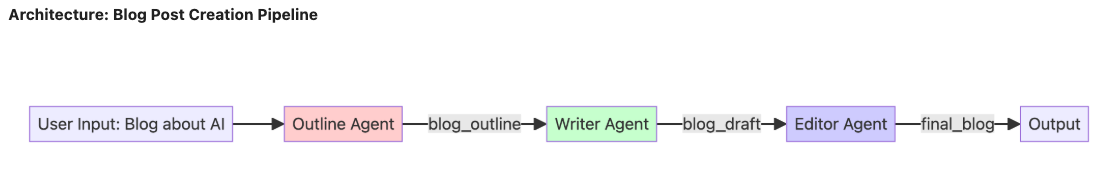

1. Outline Agent - 주어진 주제에 대해 블로그 포스트의 개요를 만든다.
2. Writer Agent - 블로그 포스트를 작성한다.
3. Editor Agent - 작성된 블로그포스트의 내용 명확도, 구조 등을 다듬는다. 

In [28]:
# Outline AGent: Create the initial blog post outline
outline_agent = Agent(
    name="OutlineAgent",
    model="gemini-2.5-flash-lite",
    instruction="""Create a blog outline for the given topic with:
    1. A catchy headline
    2. An introduction hook
    3. 3-5 main sections with 2-3 bullet points for each
    4. A concluding thought""",
    output_key="blog_outline",
)

print("✅ outline_agent created.")

✅ outline_agent created.


In [29]:
# Writer Agent: Write the full blog post based on the outline from the previous agent.
writer_agent = Agent(
    name="WriterAgent",
    model="gemini-2.5-flash-lite",
    # The {blog_outline} placeholder automatically injects the state value from the previous agent's output.
    instruction="""Following this outline strictly: {blog_outline}, 
    write a brief, 200 to 300-word blog post with an engaging and informative tone.""",
    output_key="blog_draft",
)

print("✅ writer_agent created.")

✅ writer_agent created.


In [30]:
# Editor Agent: Edits and polishes the draft from the writer agent.
editor_agent = Agent(
    name="EditorAgent",
    model="gemini-2.5-flash-lite",
    # This agent receives the {blog_draft} from the previous writer agent.
    instruction="""Edit this draft: {blog_draft}
    Your task is to polish the text by fixing any grammatical erros, improving the flow and sentence structure, 
    and enahncing overall readability. At the same time, ensure to provide Korean translation of the blog post.""",
    output_key="final_blog",
)

print("✅ editor_agent created.")

✅ editor_agent created.


In [31]:
# bring the agents together in a sequential workflow
root_agent = SequentialAgent(
    name="BlogPipeline",
    sub_agents=[
        outline_agent,
        writer_agent,
        editor_agent
    ],
)

print("✅ root_agent (SequentialAgent) created.")

✅ root_agent (SequentialAgent) created.


In [32]:
runner = InMemoryRunner(agent = root_agent)
response = await runner.run_debug("Write a blog post about the benefits of multi-agent systems for software developers")


 ### Created new session: debug_session_id

User > Write a blog post about the benefits of multi-agent systems for software developers
OutlineAgent > ## OutlineAgent: Generating Blog Post Outline

**Topic:** Benefits of Multi-Agent Systems for Software Developers

---

**1. Catchy Headline:**

*   **Unleash the Power of Collaboration: How Multi-Agent Systems Can Revolutionize Your Development Workflow**

**2. Introduction Hook:**

*   Imagine a development team where every member is an intelligent, specialized expert, working tirelessly and autonomously to achieve project goals. This isn't science fiction anymore. Multi-agent systems (MAS) are bringing this level of sophisticated collaboration to the realm of software development, offering unprecedented benefits for developers.

**3. Main Sections:**

*   **Section 1: Enhanced Problem Solving and Complexity Management**
    *   Break down complex problems into smaller, manageable tasks assigned to specialized agents, reducing cognitiv


 ### Created new session: debug_session_id

User > Write a blog post about the benefits of multi-agent systems for software developers
OutlineAgent > ## OutlineAgent: Generating Blog Post Outline

**Topic:** Benefits of Multi-Agent Systems for Software Developers

---

**1. Catchy Headline:**

*   **Unleash the Power of Collaboration: How Multi-Agent Systems Can Revolutionize Your Development Workflow**

**2. Introduction Hook:**

*   Imagine a development team where every member is an intelligent, specialized expert, working tirelessly and autonomously to achieve project goals. This isn't science fiction anymore. Multi-agent systems (MAS) are bringing this level of sophisticated collaboration to the realm of software development, offering unprecedented benefits for developers.

**3. Main Sections:**

*   **Section 1: Enhanced Problem Solving and Complexity Management**
    *   Break down complex problems into smaller, manageable tasks assigned to specialized agents, reducing cognitive load for individual developers.
    *   Leverage the collective intelligence of multiple agents to explore diverse solutions and identify optimal approaches more efficiently.
    *   Facilitate parallel processing and distributed computation, accelerating development cycles for intricate software.
...

마지막으로, MAS는 **효율성 및 자동화 개선**을 가능하게 합니다. 코드 생성, 테스트, 배포와 같은 반복적인 작업은 전담 에이전트에 의해 완전히 자동화될 수 있습니다. 또한, 에이전트는 지능적인 중개자 역할을 하여 개발팀 내의 커뮤니케이션과 조정을 간소화하며, 지속적 통합 및 지속적 전달(CI/CD) 파이프라인을 강력하게 추진할 수 있습니다.

멀티 에이전트 시스템은 소프트웨어 개발에 있어 중요한 패러다임 전환을 나타냅니다. 지능형 협업 및 분산 지능의 원칙을 수용함으로써, 개발자들은 더 강력하고 적응력 있는 소프트웨어 솔루션을 구축하여 혁신과 효율성의 새로운 시대를 열 수 있습니다.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...


 ### Created new session: debug_session_id

User > Write a blog post about the benefits of multi-agent systems for software developers
OutlineAgent > **Outline:**

**Headline:** Supercharge Your Software: How Multi-Agent Systems Are Your Next Big Development Win

**Introduction Hook:** Ever feel like your software projects are juggling too many balls? What if there was a way to break down complex tasks, improve efficiency, and build more robust applications by having your code work *together* intelligently? Enter Multi-Agent Systems (MAS) – a paradigm shift that's empowering developers to think about software in a whole new, collaborative way.

**Main Sections:**

1.  **What Exactly Are Multi-Agent Systems (MAS)?**
    *   Think of it as a team of independent "agents," each with specific skills and goals, communicating and coordinating to achieve a larger objective.
    *   Unlike traditional monolithic architectures, MAS breaks down complexity into manageable, specialized units.
    *   These agents can be simple or sophisticated, capable of learning, adapting, and even negotiating with each other.

2.  **The Developer's Advantage: Key Benefits of Embracing MAS**
    *   **Enhanced Modularity and Maintainability:** Each agent can be developed, tested, and updated independently, reducing the risk of introducing bugs into the entire system and simplifying ongoing maintenance.
    *   **Improved Scalability and Flexibility:** Easily add or remove agents to scale your application up or down based on demand, or swap out agents with improved versions without affecting the whole system.
    *   **Robustness and Fault Tolerance:** If one agent fails, the system can often continue to function by reassigning tasks or relying on other agents, making it more resilient to errors.

3.  **Real-World Applications: Where MAS is Already Making Waves**
    *   **Smart Grids and Energy Management:** Agents optimizing energy distribution and consumption in real-time.
    *   **Robotics and Automation:** Coordinating multiple robots for complex tasks in manufacturing or exploration.
...

Ready to explore this powerful paradigm? Start by identifying problems within your projects that could benefit from decomposition into independent, interacting components. Familiarize yourself with existing MAS frameworks and libraries, such as JADE or SPADE, or consider custom implementations. Crucially, invest time in designing effective agent communication protocols and coordination strategies.

Multi-Agent Systems represent a significant evolution in software development. They offer a practical and powerful way to build smarter, more adaptable, and more resilient applications. It's time to embrace this collaborative model and let your code work together as a high-performing team.
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

## Parallel Workflows - Independent Researchers

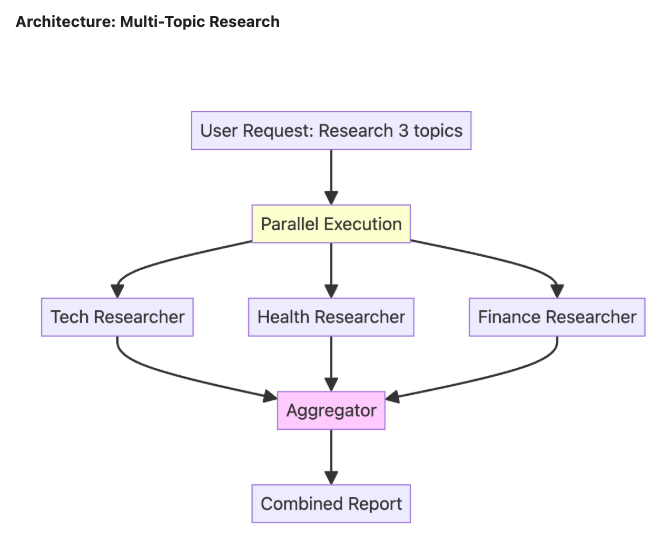

In [ ]:
# Tech Researcher: Focuses on AI and ML trends.
tech_researcher = Agent(
    name="TechResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research the latest AI/ML trends. Include 3 key developments,
the main companies involved, and the potential impact. Keep the report very concise (100 words).""",
    tools=[google_search],
    output_key="tech_research", # The result of this agent will be stored in the session state with this key.
)

print("✅ tech_researcher created.")

In [ ]:
# Health Researcher: Focuses on medical breakthroughs.
health_researcher = Agent(
    name="HealthResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research recent medical breakthroughs. Include 3 significant advances,
their practical applications, and estimated timelines. Keep the report concise (100 words).""",
    tools=[google_search],
    output_key="health_research", # The result will be stored with this key.
)

print("✅ health_researcher created.")

In [ ]:
# Finance Researcher: Focuses on fintech trends.
finance_researcher = Agent(
    name="FinanceResearcher",
    model="gemini-2.5-flash-lite",
    instruction="""Research current fintech trends. Include 3 key trends,
their market implications, and the future outlook. Keep the report concise (100 words).""",
    tools=[google_search],
    output_key="finance_research", # The result will be stored with this key.
)

print("✅ finance_researcher created.")

In [ ]:
# The AggregatorAgent runs *after* the parallel step to synthesize the results.
aggregator_agent = Agent(
    name="AggregatorAgent",
    model="gemini-2.5-flash-lite",
    # It uses placeholders to inject the outputs from the parallel agents, which are now in the session state.
    instruction="""Combine these three research findings into a single executive summary:

    **Technology Trends:**
    {tech_research}
    
    **Health Breakthroughs:**
    {health_research}
    
    **Finance Innovations:**
    {finance_research}
    
    Your summary should highlight common themes, surprising connections, and the most important key takeaways from all three reports. The final summary should be around 200 words.""",
    output_key="executive_summary", # This will be the final output of the entire system.
)

print("✅ aggregator_agent created.")

In [ ]:
# The ParallelAgent runs all its sub-agents simultaneously.
parallel_research_team = ParallelAgent(
    name="ParallelResearchTeam",
    sub_agents=[tech_researcher, health_researcher, finance_researcher],
)

# This SequentialAgent defines the high-level workflow: run the parallel team first, then run the aggregator.
root_agent = SequentialAgent(
    name="ResearchSystem",
    sub_agents=[parallel_research_team, aggregator_agent],
)

print("✅ Parallel and Sequential Agents created.")

In [ ]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("Run the daily executive briefing on Tech, Health, and Finance")

## Loop Workflows - the refinement cycle

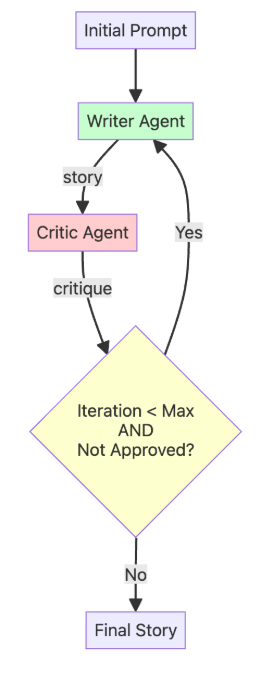

In [ ]:
# This agent runs ONCE at the beginning to create the first draft.
initial_writer_agent = Agent(
    name="InitialWriterAgent",
    model="gemini-2.5-flash-lite",
    instruction="""Based on the user's prompt, write the first draft of a short story (around 100-150 words).
    Output only the story text, with no introduction or explanation.""",
    output_key="current_story", # Stores the first draft in the state.
)

print("✅ initial_writer_agent created.")

In [ ]:
# This agent's only job is to provide feedback or the approval signal. It has no tools.
critic_agent = Agent(
    name="CriticAgent",
    model="gemini-2.5-flash-lite",
    instruction="""You are a constructive story critic. Review the story provided below.
    Story: {current_story}
    
    Evaluate the story's plot, characters, and pacing.
    - If the story is well-written and complete, you MUST respond with the exact phrase: "APPROVED"
    - Otherwise, provide 2-3 specific, actionable suggestions for improvement.""",
    output_key="critique", # Stores the feedback in the state.
)

print("✅ critic_agent created.")

In [ ]:
# This is the function that the RefinerAgent will call to exit the loop.
def exit_loop():
    """Call this function ONLY when the critique is 'APPROVED', indicating the story is finished and no more changes are needed."""
    return {"status": "approved", "message": "Story approved. Exiting refinement loop."}

print("✅ exit_loop function created.")

In [ ]:
# This agent refines the story based on critique OR calls the exit_loop function.
refiner_agent = Agent(
    name="RefinerAgent",
    model="gemini-2.5-flash-lite",
    instruction="""You are a story refiner. You have a story draft and critique.
    
    Story Draft: {current_story}
    Critique: {critique}
    
    Your task is to analyze the critique.
    - IF the critique is EXACTLY "APPROVED", you MUST call the `exit_loop` function and nothing else.
    - OTHERWISE, rewrite the story draft to fully incorporate the feedback from the critique.""",
    
    output_key="current_story", # It overwrites the story with the new, refined version.
    tools=[FunctionTool(exit_loop)], # The tool is now correctly initialized with the function reference.
)

print("✅ refiner_agent created.")

In [ ]:
# The LoopAgent contains the agents that will run repeatedly: Critic -> Refiner.
story_refinement_loop = LoopAgent(
    name="StoryRefinementLoop",
    sub_agents=[critic_agent, refiner_agent],
    max_iterations=2, # Prevents infinite loops
)

# The root agent is a SequentialAgent that defines the overall workflow: Initial Write -> Refinement Loop.
root_agent = SequentialAgent(
    name="StoryPipeline",
    sub_agents=[initial_writer_agent, story_refinement_loop],
)

print("✅ Loop and Sequential Agents created.")

In [ ]:
runner = InMemoryRunner(agent=root_agent)
response = await runner.run_debug("Write a short story about a lighthouse keeper who discovers a mysterious, glowing map")